### İşe Alım Robotu
Öncelikle yazacağımız kodun konseptinden bahsetmekte fayda var.
Bir şirkete başvuran 1000 adaydan 100'ü işe alınmış olsun. Her adayın "Social Skills, Knowledge in algorithms, GPA ve Age" gibi 4 temel özelliği olsun, ama bu özelliklerden sadece Social Skills, Knowledge in algorithms işe alınma için gerçekten ayırt edici olsun. Bu özelliklerin 0 ile 5 arasında değer aldığını kabul edelim.

ve işe alınanlar kişilerin Social Skills ve Knowledge in algorithms özellikleri 5 üzerinden 5'e yakın rastgele sayılardan oluşsun. Diğer özellikler olan GPA, Age ise rastgele doldurulsun.
İşe alınmayanlarda ise Social Skills ve Knowledge in algorithms 5 üzerinden 1'e yakın rastgele sayılardan oluşsun.ve yine diğer özellikler olan GPA, Age ise rastgele doldurulsun.

Öncelikle bu veri setini oluşturalım. Daha sonra da Öklid Temelli İşe Alım Algoritması ile test setindeki adaylardan kimlerin işe alınıp kimlerin alınmayacağını test edelim.

Kod boyunca kullanacağımız tüm kütüphaneleri ekleyerek başlayalım.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2019)

Belirlenen min ve max değeri arasında ortalaması "mu" olan ve standart sapması 1 olan normal dağılımdan sayı üreten bir fonksiyon yazalım.

In [3]:
def generate(mu = None, minval = 0, maxval = 5):
    # Eger mu None ise, mu degeri minval ve maxval'in ortalaması olsun
    if mu == None:
        mu = np.mean([minval,maxval])
    
    # val, ortalaması mu olan, standart sapması 1 olan normal dağılımdan bir rastgele sayı olsun
    val =np.random.normal(mu, 1)
    
#   Eger val, maxval'den büyükse veye minval'den küçükse, sayıyı tekrar üretelim
    while val>maxval or val<minval :
        val =np.random.normal(mu, 1)
    return val

#### Veri Seti Oluşturalım
Generate fonksiyonu ile bir veri seti oluşturalım. Oluşturduğumuz veri setinde Social Skills, Knowledge in algorithms, GPA, Age, Target gibi özellikler olsun. Adayın başarı değerlendirmesinde ise Social Skills ve Knowledge in algorithms önemli, GPA ve Age önemsiz veriler olsun. <br>
Üreteceğimiz veri setinde ilk yüz aday başarılı olsun ve
- target = 1,
- Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayılar,
- GPA ve AGE, 0 ve 5 arasinda rastgele sayılardan oluşsun.

Ürettiğimiz son 900 aday ise başarısız olsun ve 
- target = 0,
- Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayılar,
- GPA ve AGE, 0 ve 5 arasinda rastgele sayılardan oluşsun.

In [4]:
social_skills = []
algorithm_knowledge = []
GPA = []
Age = []
target=[]

for i in range(100):
    social_skills.append(round(generate(minval=2.7), 6))
    algorithm_knowledge.append(round(generate(minval=2.7), 6))
    GPA.append(round(generate(), 6))
    Age.append(round(generate(), 6))
    target.append(1)
    
for i in range(900):
    social_skills.append(round(generate(maxval=2.5), 6))
    algorithm_knowledge.append(round(generate(maxval=2.5), 6))
    GPA.append(round(generate(), 6))
    Age.append(round(generate(), 6))
    target.append(0)

Ardından veri dictionary'si oluşturalım ve verimizi pandas dataframe'e dönüştürelim.

In [5]:
datadict = {"social":social_skills, "algorithm":algorithm_knowledge, "gpa":GPA, "age":Age, "y":target}
data = pd.DataFrame.from_dict(datadict)

Verimizin ilk ve son 10 satırını görelim.

In [6]:
data.head(10)

,social,algorithm,gpa,age,y
0,3.632321,4.671455,3.981278,3.831864,1
1,3.488135,4.535609,3.073761,2.787728,1
2,3.614366,4.803490,0.810375,2.155057,1
3,3.866905,3.335016,2.744509,2.310687,1
4,4.314802,4.695930,1.996458,1.536664,1
5,3.914969,4.904969,3.307277,2.974141,1
6,4.260928,4.336689,1.964470,1.661092,1
7,3.037625,3.399207,3.570801,2.717421,1
8,2.923883,2.856052,3.086806,3.563813,1
9,4.087741,3.074943,1.520896,0.950637,1


In [7]:
data.tail(10)

,social,algorithm,gpa,age,y
990,2.075205,1.110226,0.411952,3.382964,0
991,0.145598,2.334337,2.030630,1.671812,0
992,0.758109,1.468240,1.581316,4.087012,0
993,1.168546,0.805057,2.485693,2.435521,0
994,1.533854,0.901360,1.578582,3.227614,0
995,0.364191,1.916583,1.868570,1.156315,0
996,1.319413,1.388719,1.250696,3.536316,0
997,1.667544,2.362136,3.992645,0.825649,0
998,0.613938,2.245585,0.552004,2.733080,0
999,0.109475,1.305941,3.533353,2.120940,0


Veri özelliklerine göz atalım.

In [8]:
data.describe()

,social,algorithm,gpa,age,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.508976,1.497741,2.438807,2.461546,0.10000
std,1.025352,1.033184,0.956649,0.959651,0.30015
min,0.003881,0.013318,0.017718,0.033899,0.00000
25%,0.795781,0.761564,1.739258,1.821949,0.00000
50%,1.372168,1.341863,2.457422,2.484546,0.00000
75%,1.972942,2.005898,3.105033,3.087286,0.00000
max,4.960436,4.996085,4.923282,4.951061,1.00000


#### Veriyi Kaydedelim
ve Verimizi Okuyalım

In [39]:
data.to_csv("data.csv", index=False)


import requests
import io
url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

#data= pd.read_csv("data.csv")

#### Veriyi Görselleştirelim
Bir kaç grafik oluşturalım ve veriyi görselleştirelim

Text(0.5, 1.0, 'Successful Candidates')

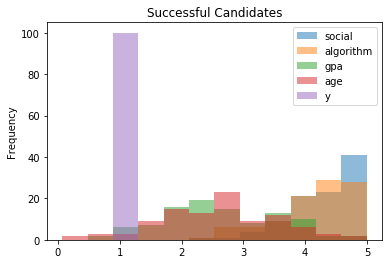

In [40]:
ax = data[data.y == 1].plot.hist(bins=12, alpha=0.5)
plt.title("Successful Candidates")

Text(0.5, 1.0, 'Unsuccessful Candidates')

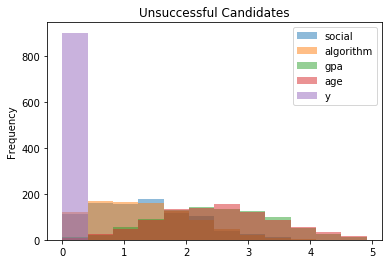

In [41]:
ax = data[data.y == 0].plot.hist(bins=12, alpha=0.5)
plt.title("Unsuccessful Candidates")

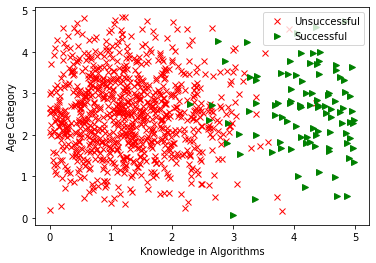

In [42]:
plt.plot(data["algorithm"][data.y == 0],data["age"][data.y == 0],"xr" , label='Unsuccessful')
plt.plot(data["algorithm"][data.y == 1],data["age"][data.y == 1],">g" , label='Successful')
plt.xlabel("Knowledge in Algorithms")
plt.ylabel("Age Category")
plt.legend()

#### Veri Matrisini Oluşturalım
Verimizi Social Skills, Knowledge in algorithms, GPA, Age verileri bir matris, Target verisi bir matris olacak şekilde ikiye ayıralım. Oluşturacağımız ilk matris [1000,4] boyutunda aday özelliklerini tutsun, diğer matrisimiz ise [1000,1] boyutunda adayların işe kabul sonucunun olumlu mu olumsuz mu olduğunu tutsun.

In [43]:
M = pd.DataFrame(data).to_numpy()

X = M[: , 0:4].reshape(-1,4)
y = M[: , 4].reshape(-1,1)
print("Matrix : X")
print(X)

Matrix : X
[[4.38511018 3.9027371  3.85438855 3.46275234]
 [4.87239669 4.12776812 3.80262297 3.29671891]
 [4.83024224 4.77907697 2.97946713 2.29136188]
 ...
 [1.52976627 2.31600693 4.05952622 0.84169662]
 [1.30197604 1.41804449 1.52541832 2.95788373]
 [1.34044951 1.16548149 3.0439767  2.61155526]]


#### Veriyi Normalize Edelim

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print("Normalized Matrix : X")
print(X)

Normalized Matrix : X
[[0.87741239 0.78288062 0.78485057 0.71179274]
 [0.97526433 0.82803244 0.77426785 0.67694645]
 [0.9667993  0.95871564 0.60598561 0.46594699]
 ...
 [0.30403115 0.46450787 0.82678799 0.16169826]
 [0.25828862 0.28433434 0.30872647 0.60583337]
 [0.26601447 0.23365832 0.61917365 0.53314762]]


#### Oklid Temelli İşe Alım Algoritması Oluşturalım

yeni_adaylar matrisindeki adaylari tek tek değerlendirelim.

yeni_adaylar matrisindeki adayı alalım, normalize edelim.
X matrisi ile Öklid mesafesi hesaplayalım.
En yakin k = 5 komusuyu bulalım.

Bu komşuların y kolonlarına bakalım ve yaridan fazlasi kabul almış ise, bu adayi da kabul edelim yoksa reddedelim.


In [45]:
yeni_adaylar = np.array([[5, 5, 5, 5],
                         [5, 5, 4, 4],
                         [5, 5, 3, 3],
                         [5, 5, 2, 2],
                         [5, 5, 1, 1],
                         [5, 5, 0, 0],
                         [0, 0, 1, 1],
                         [0, 0, 2, 2],
                         [0, 0, 3, 3],
                         [0, 0, 4, 4],
                         [0, 0, 5, 5],
                         [1, 2, 3, 4],
                         [1, 1, 2, 3],
                         [1, 2, 3, 4],
                         [2, 2, 4, 4]])

In [46]:
i = 0
aday = yeni_adaylar[i].reshape(1,-1)
aday = scaler.transform(aday)

#scaler.inverse_transform(aday)

print(aday)

[[1.00088834 1.0030432  1.01905418 1.03442284]]


Tüm yapacağımız bu işlemleri bir ise_alım fonksiyonu altında yapalım

In [47]:
def ise_alim(yeni = 0, k = 5):
    # Yeni aday matrisinden adaylari sec 
    aday = yeni_adaylar[yeni].reshape(1,-1)
    # Transfrom et
    aday = scaler.transform(aday)
    # X ile Farkini al
    D = X-aday
    # Farkin karesi
    D2 = D*D
#    print(type(D2))
    # Oklid mesafesini hesapla
    mesafe = np.sqrt(np.sum(D2, axis=1))
#    print((mesafe))
    # Mesafeleri buyukten kucuge sirala, en kucuk k komsunun indeksi
    k_komsu = mesafe.argsort()[:k]
#    print(k_komsu)
    if np.mean(y[k_komsu]) > 0.5: 
        print(yeni_adaylar[yeni].reshape(1,-1), ">> Kabul")
    else:
        print(yeni_adaylar[yeni].reshape(1,-1), ">>Red")

Yeni Aday matrisindeki tüm adayları tek tek ise_alım fonksiyonuna sokalım

In [48]:
for i in range(yeni_adaylar.shape[0]):
    ise_alim(yeni = i, k = 5)

[[5 5 5 5]] >> Kabul
[[5 5 4 4]] >> Kabul
[[5 5 3 3]] >> Kabul
[[5 5 2 2]] >> Kabul
[[5 5 1 1]] >> Kabul
[[5 5 0 0]] >> Kabul
[[0 0 1 1]] >>Red
[[0 0 2 2]] >>Red
[[0 0 3 3]] >>Red
[[0 0 4 4]] >>Red
[[0 0 5 5]] >>Red
[[1 2 3 4]] >>Red
[[1 1 2 3]] >>Red
[[1 2 3 4]] >>Red
[[2 2 4 4]] >>Red


**Not:** Bu kod Ka|Ve Ar-Ge Eğitim mülakatı için yazılmıştır.